In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [7]:
# Tạo DataFrame
du_lieu = pd.read_csv(r"C:\Users\FPTSHOP\Downloads\du_lieu_gia_lap.csv")
print(du_lieu)

     So_bai_viet  So_binh_luan  So_luot_thich
0             88           183            386
1             78           198            218
2             64           188            376
3             92           198            299
4             57           124            432
..           ...           ...            ...
295           10            16             72
296           16            48             25
297            7            19             46
298            3            47             85
299            5            24             55

[300 rows x 3 columns]


In [3]:
# Áp dụng K-means
kmeans = KMeans(n_clusters=3, random_state=42)
du_lieu['Nhom'] = kmeans.fit_predict(du_lieu)

C:\Users\FPTSHOP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
# Gán nhãn cho các cụm
labels = ['Người dùng tích cực', 'Người dùng bình thường', 'Người dùng ít tích cực']
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=du_lieu.columns[:-1])
centroids['Nhãn'] = labels

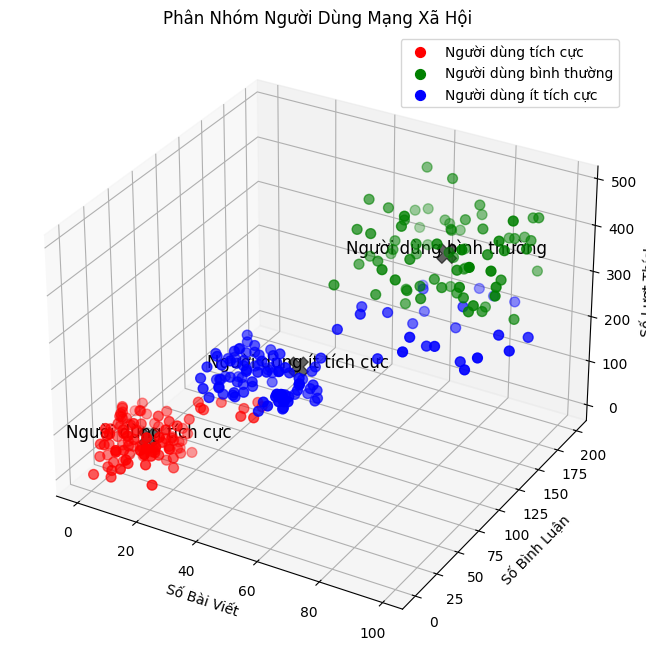

In [5]:
# Trực quan hóa kết quả
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
for i in range(3):
    clustered_data = du_lieu[du_lieu['Nhom'] == i]
    ax.scatter(clustered_data['SoBaiViet'], clustered_data['SoBinhLuan'], clustered_data['SoLuotThich'], 
               c=colors[i], label=labels[i], s=50)

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           c='black', s=200, alpha=0.6, marker='X')

for i, txt in enumerate(centroids['Nhãn']):
    ax.text(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], kmeans.cluster_centers_[i, 2], 
            txt, fontsize=12, ha='center')

ax.set_xlabel('Số Bài Viết')
ax.set_ylabel('Số Bình Luận')
ax.set_zlabel('Số Lượt Thích')
ax.set_title('Phân Nhóm Người Dùng Mạng Xã Hội')
ax.legend()
plt.show()
